In [1]:
#importing libraries such as pandas, numpy and matploylib, seaborn for the visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading our cleaned_releases_allmedia csv file to use
df = pd.read_csv('cleaned_releases_Air.csv')

In [3]:
#printing the columns of our dataset
df.columns

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'NAICS', 'NAICS Title',
       'PROVINCE', 'Latitude', 'Longitude', 'CAS_Number',
       'Substance Name (English)', 'Estimation_Method',
       'Total Release to Air'],
      dtype='object')

In [4]:
#checking if there is still any missing values but we already cleaned in our old file
df.isnull().sum()

,0
Reporting_Year,0
NPRI_ID,0
Company_Name,0
NAICS,0
NAICS Title,0
PROVINCE,0
Latitude,0
Longitude,0
CAS_Number,0
Substance Name (English),0


In [5]:
# Selecting only numerical columns (float64 and int64 types) from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculating the first quartile (Q1) - 25th percentile for each numerical column
Q1 = df[numerical_columns].quantile(0.25)

# Calculating the third quartile (Q3) - 75th percentile for each numerical column
Q3 = df[numerical_columns].quantile(0.75)

# Computing the Interquartile Range (IQR), which is the range between Q3 and Q1
IQR = Q3 - Q1

# Defining the lower bound for detecting outliers (1.5 * IQR below Q1)
lower_bound = Q1 - 1.5 * IQR

# Defining the upper bound for detecting outliers (1.5 * IQR above Q3)
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers by checking if values are outside the lower or upper bounds
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Counting the number of outliers per column
outliers_count = outliers.sum()

# Printing the number of outliers detected in each numerical column
print("Number of outliers per column:")
print(outliers_count)




Number of outliers per column:
Reporting_Year              0
NPRI_ID                     2
NAICS                   19682
Latitude                 3245
Longitude                 955
Total Release to Air    84281
dtype: int64


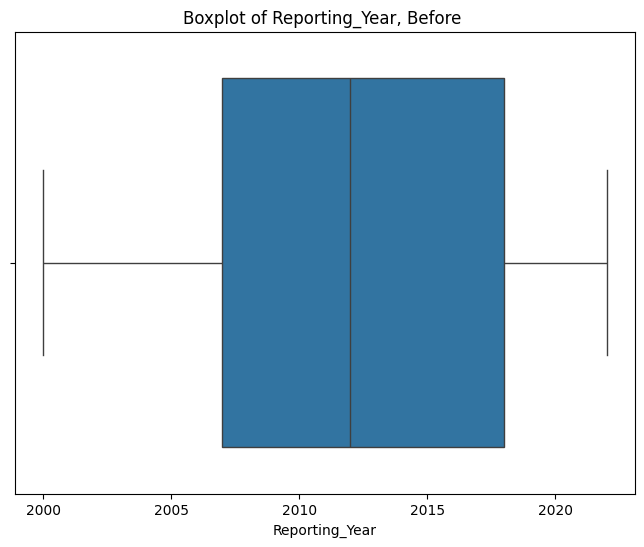

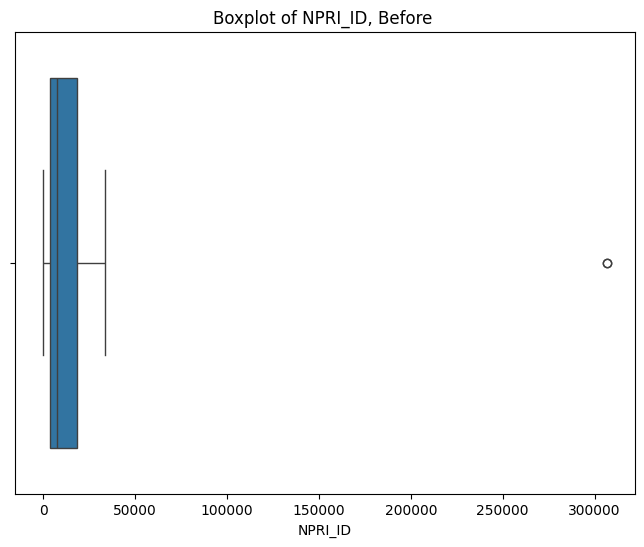

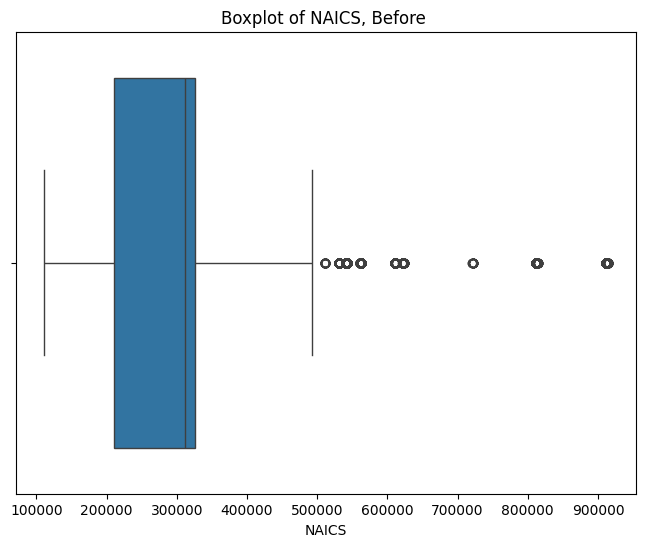

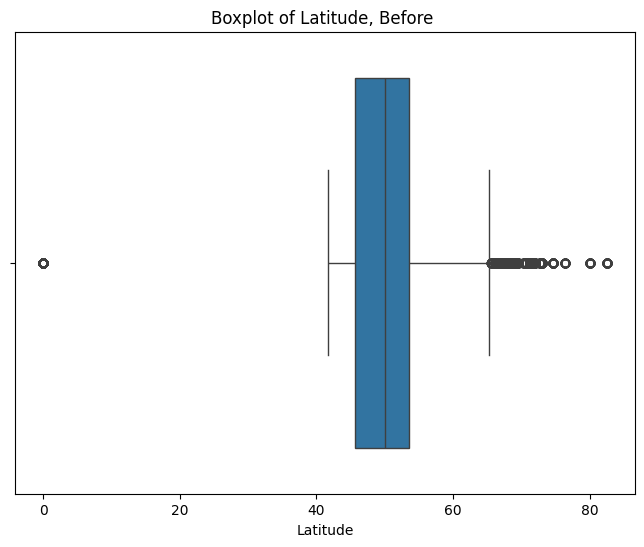

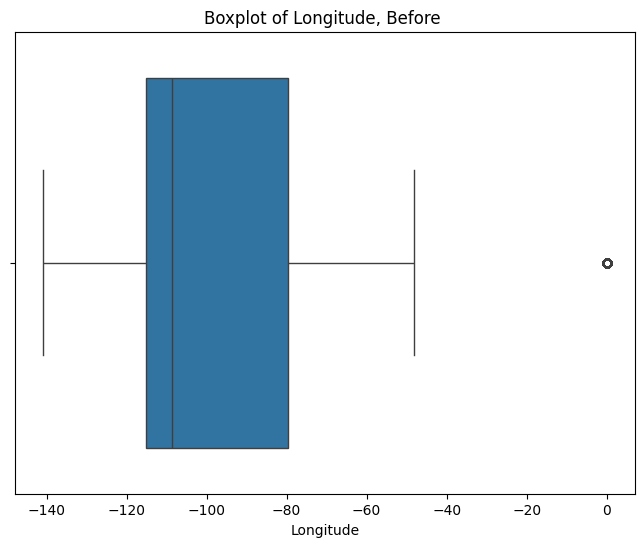

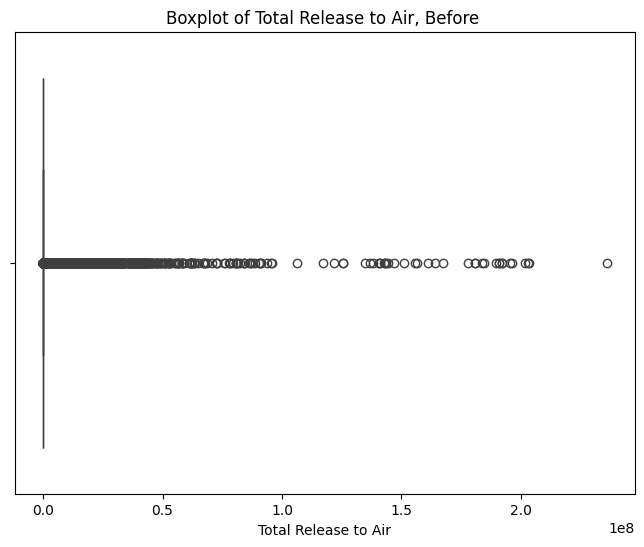

In [6]:
# Generating a boxplot for the current column to visualize its distribution and outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, Before ')
    plt.show()

In [7]:
# Capping outliers at the upper and lower bounds
for col in numerical_columns:
    # If a value is greater than the upper bound, replace it with the upper bound.
    # If a value is less than the lower bound, replace it with the lower bound.
    # Otherwise, keep the original value.
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col],
                       np.where(df[col] < lower_bound[col], lower_bound[col], df[col]))

    print("Outliers have been capped.")

Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.
Outliers have been capped.


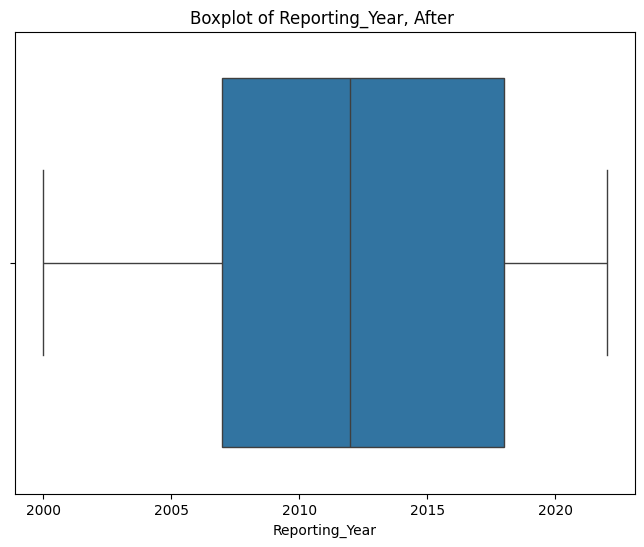

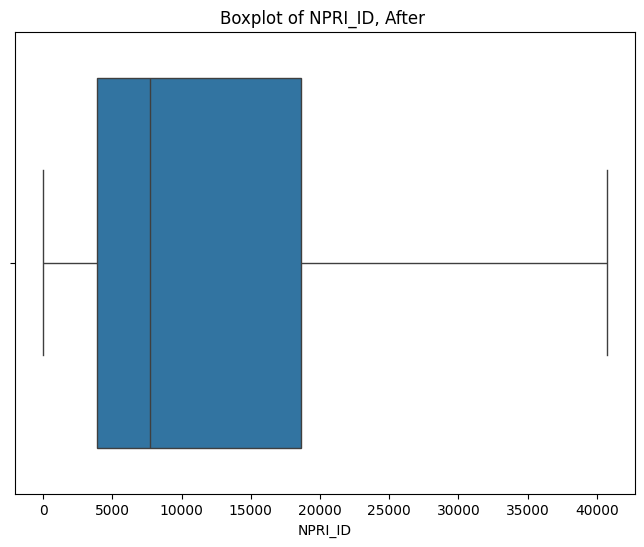

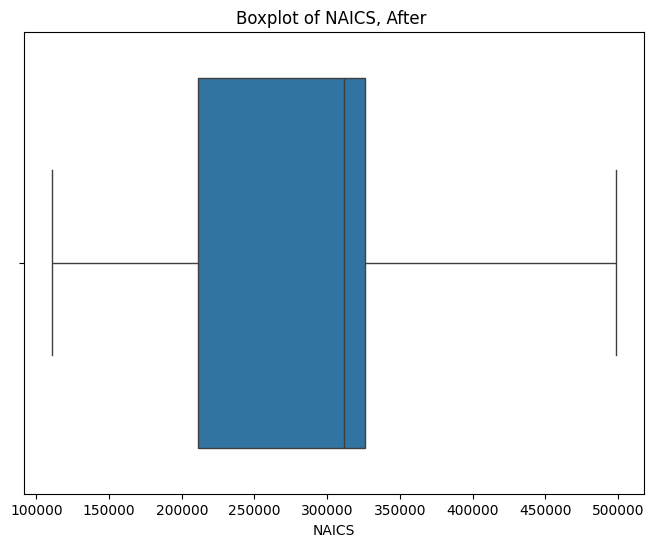

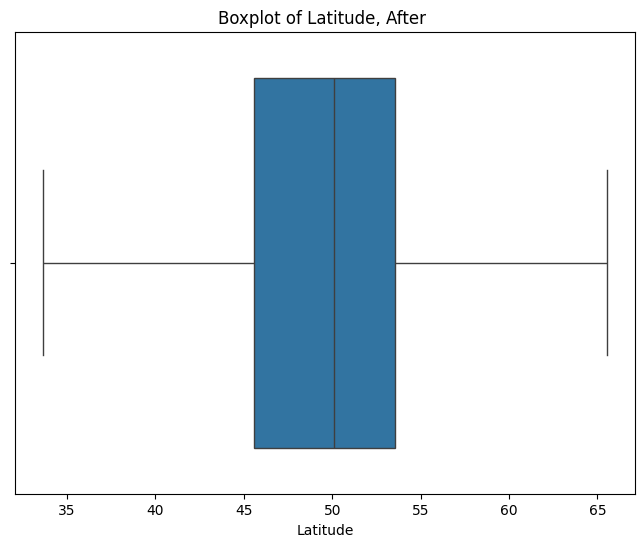

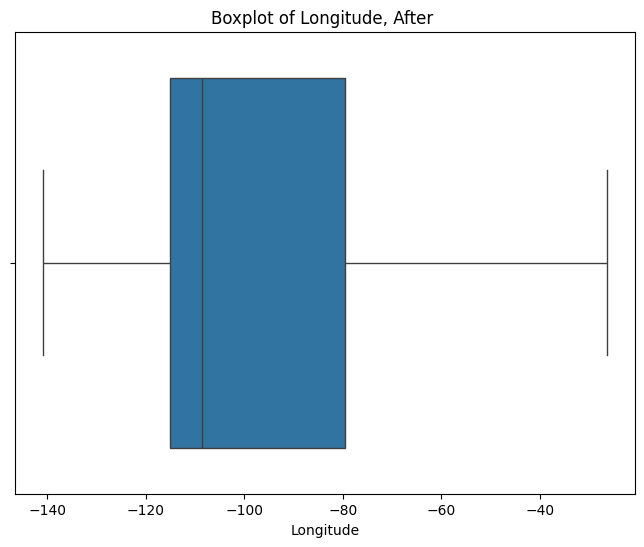

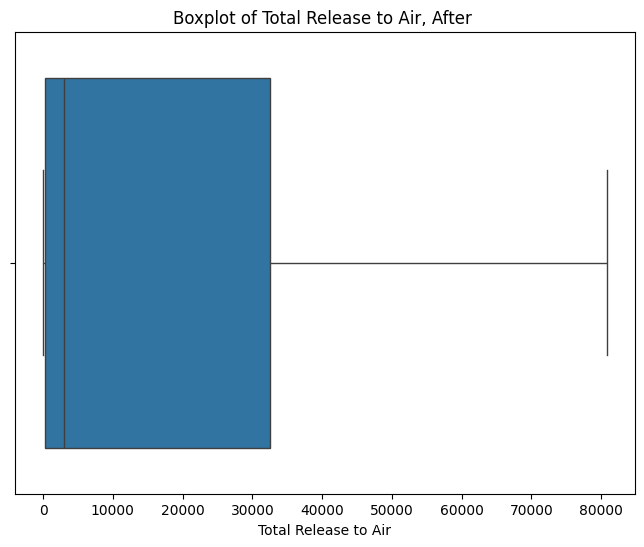

In [8]:
# Generating a boxplot for the current column to visualize its distribution after removing outliers

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}, After ')
    plt.show()

In [9]:
df.to_csv("After Removing Outliers_Air.csv", index=False)

This bar chart shows the total air pollutant releases in the top 10 provinces over the recorded years.

Key Insights:
Alberta (AB) has the highest total air emissions, significantly more than any other province.
Ontario (ON) and British Columbia (BC) follow, but their emissions are much lower than Alberta’s.
The other provinces have much smaller total emissions, with NT (Northwest Territories) having the lowest among the top 10.

<ipython-input-10-7783f2a8a1a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")


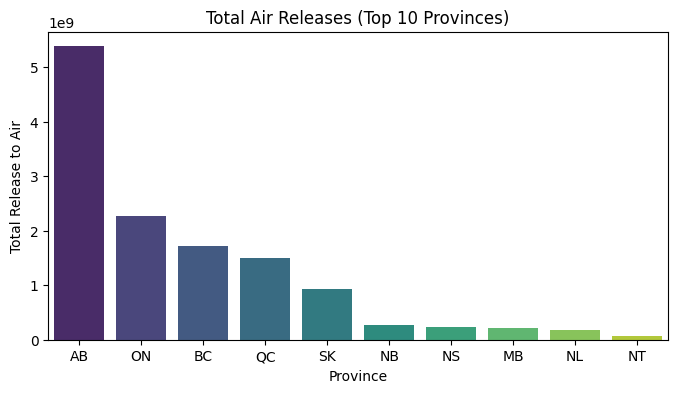

In [10]:
# Get the top 10 provinces by total air release
top_provinces = df.groupby("PROVINCE")["Total Release to Air"].sum().nlargest(10)

# Bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=top_provinces.index, y=top_provinces.values, palette="viridis")

# Labels and title
plt.title("Total Air Releases (Top 10 Provinces)")
plt.xlabel("Province")
plt.ylabel("Total Release to Air")

plt.show()


Interpretation of the Graph Based on the Code
X-axis (Year): Represents different years from 2000 to 2022.
Y-axis (Releases): Shows the total amount of air pollution released each year.
Bars: Indicate the total air pollution emissions for each year, summed across all sources.
Key Trends:
2000–2002: Low emissions, but sharp increase in 2003.
2003–2010: Peak emissions (~7×10⁸) and relatively stable.
2011–2017: Gradual decline in air pollution.
2018–2022: Some fluctuations but generally lower than the peak years.
Possible Insights:

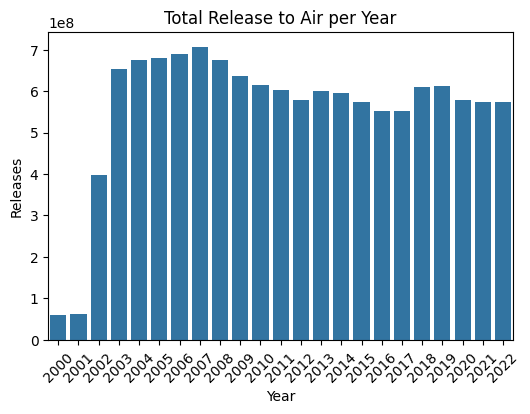

In [ ]:
df_grouped = df.groupby('Reporting_Year')['Total Release to Air'].sum().reset_index()
df_grouped['Reporting_Year'] = df_grouped['Reporting_Year'].astype(int)  # Convert to integer

plt.figure(figsize=(6,4))
sns.barplot(x='Reporting_Year', y='Total Release to Air', data=df_grouped)
plt.title('Total Release to Air per Year')
plt.xlabel('Year')
plt.ylabel('Releases')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.columns

Index(['Reporting_Year', 'NPRI_ID', 'Company_Name', 'NAICS', 'NAICS Title',
       'PROVINCE', 'Latitude', 'Longitude', 'CAS_Number',
       'Substance Name (English)', 'Estimation_Method',
       'Total Release to Air'],
      dtype='object')

The heatmap shows air emissions over time by province, with red indicating high emissions and blue indicating low emissions.

Alberta (AB) has the highest emissions, especially from 2002–2015.
Ontario (ON) shows moderate emissions, decreasing after 2013.
Other provinces have consistently low emissions.
Blank areas represent negligible or zero emissions in those years.

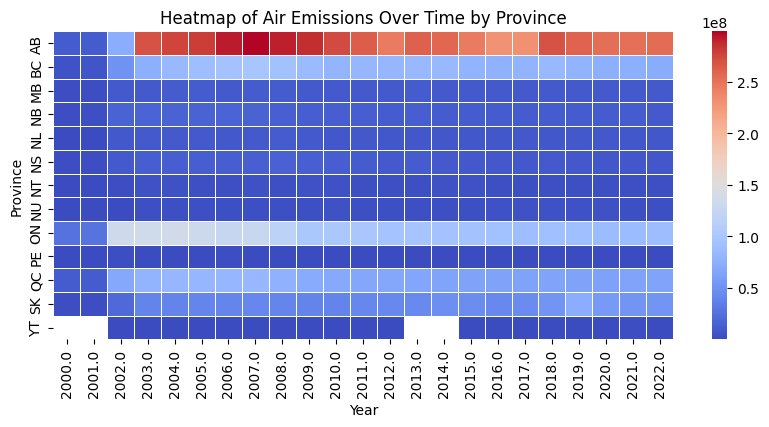

In [ ]:
pivot_df = df.pivot_table(values="Total Release to Air", index="PROVINCE", columns="Reporting_Year", aggfunc="sum")

plt.figure(figsize=(10, 4))
sns.heatmap(pivot_df, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Heatmap of Air Emissions Over Time by Province")
plt.xlabel("Year")
plt.ylabel("Province")
plt.show()



This graph shows the air pollution trend over time for the five provinces with the lowest total emissions based on NPRI data.

Key Observations: NL (Newfoundland and Labrador) has the highest emissions among the bottom 5, with a peak around 2005 and a slight downward trend afterward. NT (Northwest Territories) and NU (Nunavut) have moderate emissions with some fluctuations but relatively stable trends. PE (Prince Edward Island) and YT (Yukon) have the lowest emissions, with YT showing a slight increase in recent years. Overall, emissions remain relatively stable for most provinces, with some provinces experiencing small declines or fluctuations.

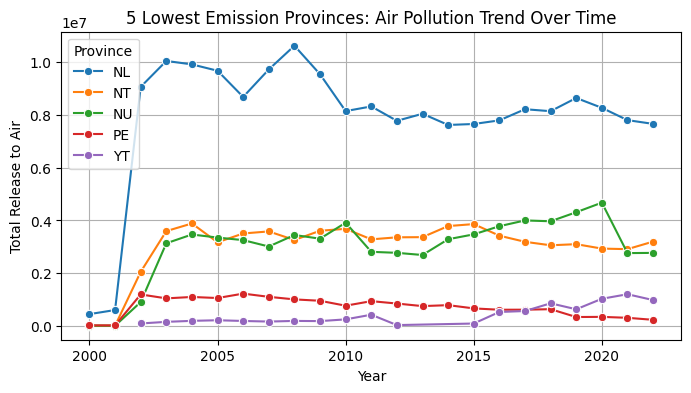

In [ ]:

province_trend = df.groupby(["PROVINCE", "Reporting_Year"])["Total Release to Air"].sum().reset_index()

# Get Bottom 5 provinces with lowest  emissions
bottom_5_provinces = province_trend.groupby("PROVINCE")["Total Release to Air"].sum().nsmallest(5).index

# Filter data for only the top 5 provinces
df_bottom_5 = province_trend[province_trend["PROVINCE"].isin(bottom_5_provinces)]

# Plot the trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=df_bottom_5, x="Reporting_Year", y="Total Release to Air", hue="PROVINCE", marker="o")

# Formatting
plt.title("5 Lowest Emission Provinces: Air Pollution Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Total Release to Air")
plt.legend(title="Province")
plt.grid(True)
plt.show()


This bar chart displays the top companies based on total air emissions, where the x-axis represents company names and the y-axis indicates the total emissions released. Notably, Canadian Natural Resources Limited has the highest emissions, significantly outpacing other companies, with a steep drop in emissions among the remaining firms.

Relevance to Your Problem: This helps identify key industrial contributors to air pollution, which can influence predictions of emission trends across provinces.

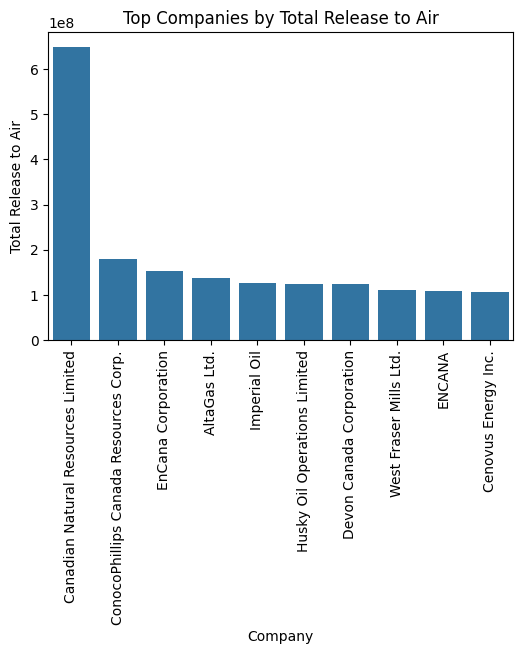

In [ ]:
top_companies = df.groupby('Company_Name')['Total Release to Air'].sum().reset_index().sort_values(by='Total Release to Air', ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x='Company_Name', y='Total Release to Air', data=top_companies)
plt.title('Top Companies by Total Release to Air')
plt.xlabel('Company')
plt.ylabel('Total Release to Air')
plt.xticks(rotation=90)
plt.show()



This heatmap shows the correlation between different variables in the NPRI dataset.

Key Takeaways:
Reporting Year & NPRI_ID (0.38) → Moderate positive correlation, meaning newer reports have more unique facilities.
Latitude & Longitude (-0.77) → Strong negative correlation, indicating a geographical pattern.
NAICS Code & NPRI_ID (-0.41) → Moderate negative correlation, suggesting certain industries have more facilities reported.
Total Release to Air & Other Variables → Weak correlations, implying no strong linear relationship with the other features.

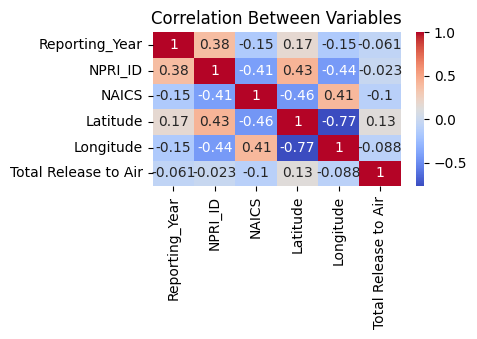

In [ ]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(4,2))
sns.heatmap(numerical_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Between Variables")
plt.show()

This pie chart represents the most common pollutants released into the environment.

Key Insights:
Nitrogen oxides (36.6%) are the most emitted pollutant, likely from combustion processes.
Carbon monoxide (27.0%) is another major contributor, mainly from fuel combustion.
Volatile Organic Compounds (16.4%) are significant, often linked to industrial emissions.
Total particulate matter (11.3%) and PM10 (8.6%) contribute to air pollution, affecting air quality and health.

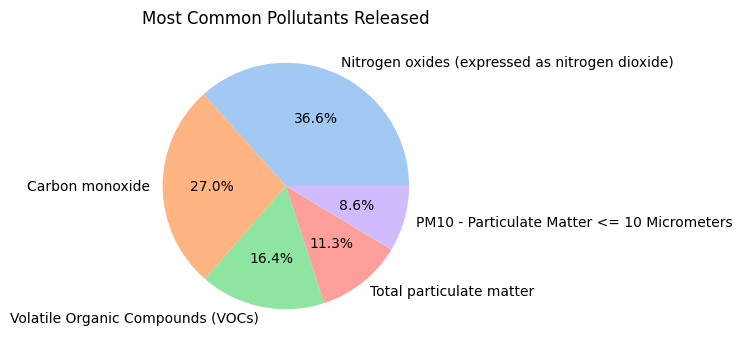

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Total Release to Air'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Total Release to Air', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Total Release to Air'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Released")
plt.show()


This scatter plot visualizes the geographic distribution of air pollution in Canada using latitude and longitude. Each point represents a pollution source, with:

Darker and larger circles indicating higher total air releases at that location.
Lighter and smaller circles indicating lower total air releases.
Most pollution sources are concentrated in southern Canada, especially in regions like Ontario, Alberta, and Quebec, which are known for their industrial activities.
Some northern locations also show air pollution.
This graph helps identify hotspots where air pollution is concentrated and could be useful for predicting which provinces might see reductions over time based on trends.

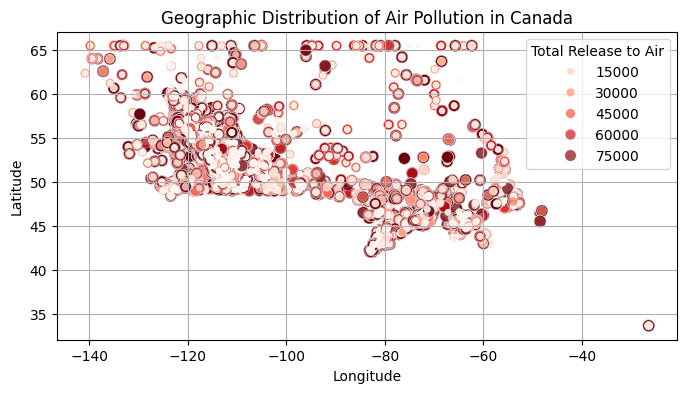

In [ ]:
plt.figure(figsize=(8, 4))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    size="Total Release to Air",
    hue="Total Release to Air",
    palette="Reds",  # Red color for pollution hotspots
    alpha=0.7
)

# Add labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Air Pollution in Canada")
plt.grid(True)

# Show plot
plt.show()

This bar chart visualizes the Total Release to Air across different Estimation Methods used for measuring air pollution.M1 (Continuous Emission Monitoring) has the highest total release to air, indicating it captures more emissions than other methods.
Unknown and RQ (Remote Quantification) also show high emissions but with significant variability.
SP (Speciation Profile) reports the lowest emissions.
The error bars suggest differences in measurement accuracy across methods.

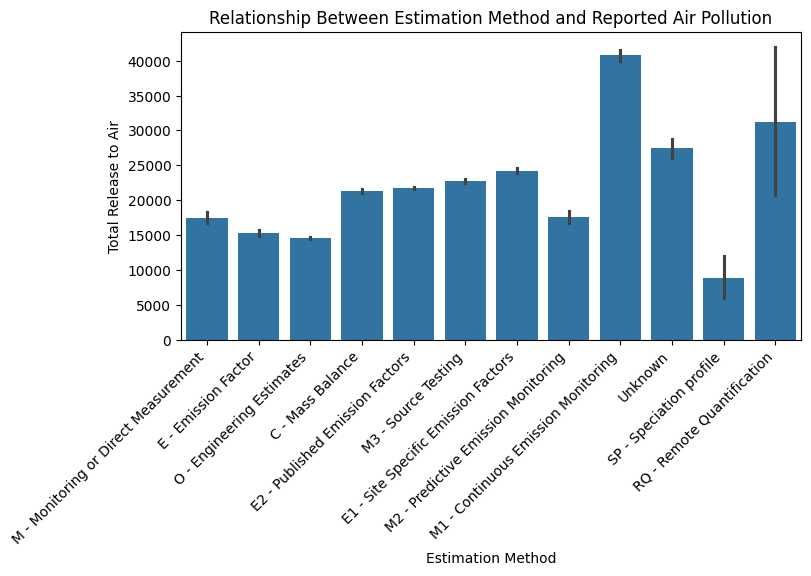

In [ ]:
plt.figure(figsize=(8, 4))

# Create a boxplot
sns.barplot(data=df, x='Estimation_Method', y='Total Release to Air')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Relationship Between Estimation Method and Reported Air Pollution')
plt.xlabel('Estimation Method')
plt.ylabel('Total Release to Air')

# Display the plot
plt.show()

The bar chart visualizes the Top 10 Polluting Industries based on Total Release to Air, categorized by NAICS codes and NAICS titles. Each industry is represented with a unique color for clarity.

The Oil and Gas Extraction industry (NAICS 211110, 211113, 211114) is the most significant contributor, with non-conventional oil extraction being the highest emitter.
Other major contributors include Fossil-fuel electric power generation (NAICS 221112) and Petroleum refineries (NAICS 324110).
Lower-emitting industries include Sawmills, Chemical Pulp Mills, and Iron & Steel Manufacturing.
This helps identify key polluting industries, which is crucial for predicting which province will see the largest pollution decrease in the next five years. Since industries like oil and gas are dominant, provinces with these sectors (e.g., Alberta) are likely to show significant changes based on regulations or cleaner technologies

#

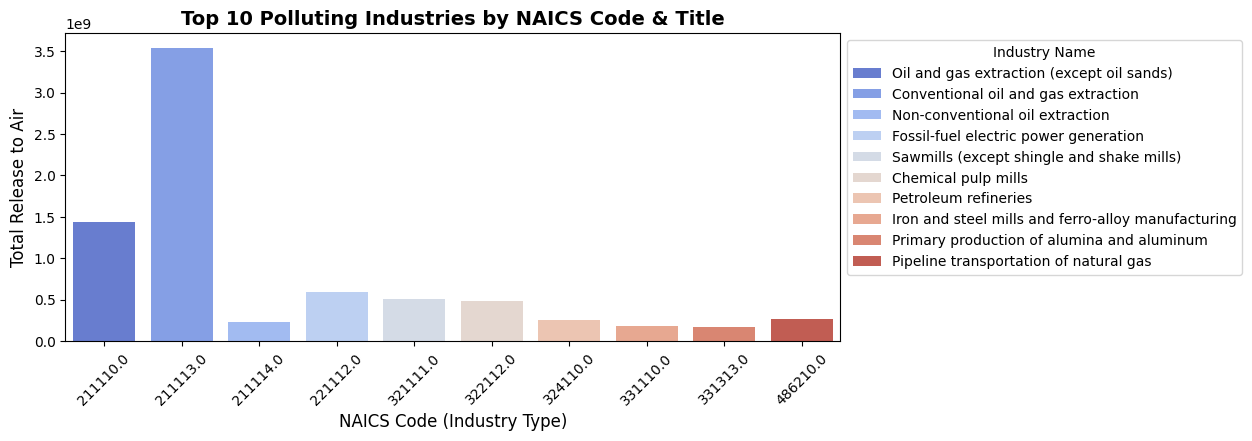

In [ ]:


# Aggregate total pollution by NAICS Code & NAICS Title
industry_pollution = df.groupby(['NAICS', 'NAICS Title'])['Total Release to Air'].sum().reset_index()

# Sort industries by total pollution (Top 10)
industry_pollution = industry_pollution.sort_values(by='Total Release to Air', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,4))
sns.barplot(data=industry_pollution, x='NAICS', y='Total Release to Air', hue='NAICS Title', dodge=False, palette='coolwarm')

# Labels and title
plt.title("Top 10 Polluting Industries by NAICS Code & Title", fontsize=14, fontweight='bold')
plt.xlabel("NAICS Code (Industry Type)", fontsize=12)
plt.ylabel("Total Release to Air", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.legend(title="Industry Name", bbox_to_anchor=(1, 1), loc='upper left')  # Move legend outside

plt.show()



Visuals for substances


This horizontal bar chart displays the top 15 substances with the highest total air release.

Nitrogen oxides and carbon monoxide have the highest emissions, exceeding 2.5 billion units.
Volatile Organic Compounds (VOCs) and particulate matter also have significant emissions.
Methanol appears in the middle of the list, with lower emissions compared to major pollutants like sulfur dioxide and PM2.5.
Substances like toluene, hydrochloric acid, and n-hexane have relatively lower total releases.

<ipython-input-23-ce39af2db64f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")


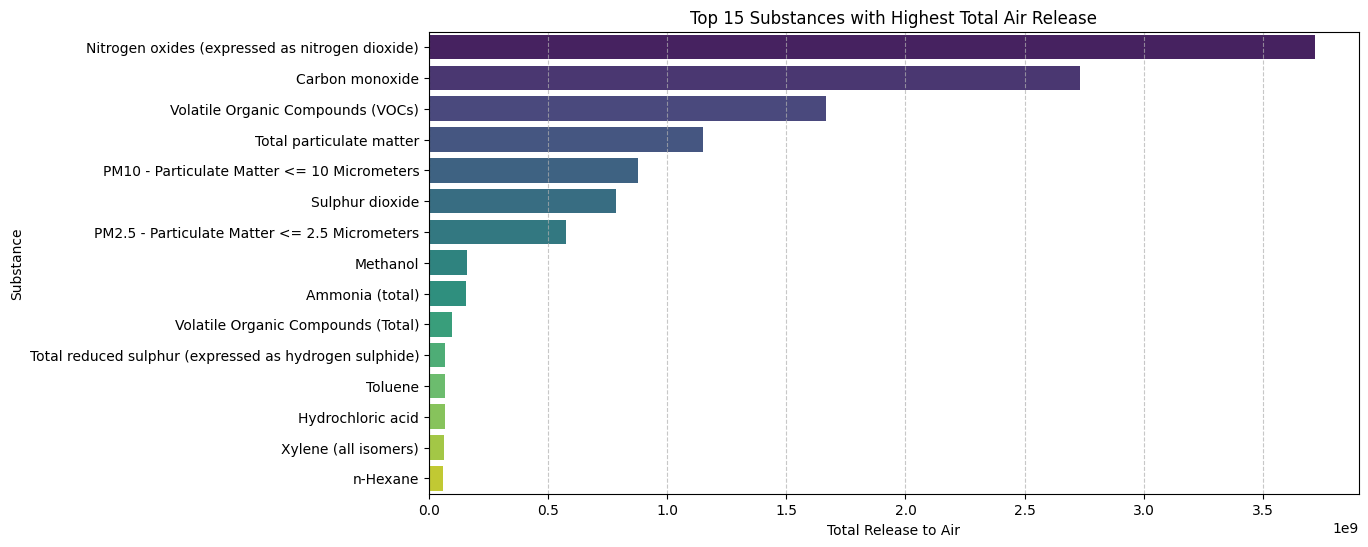

In [ ]:
top_substances = df.groupby("Substance Name (English)")['Total Release to Air'].sum().nlargest(15)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_substances.values, y=top_substances.index, palette="viridis")
plt.title("Top 15 Substances with Highest Total Air Release")
plt.xlabel("Total Release to Air")
plt.ylabel("Substance")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

The line chart shows the trend of the top 5 substances released into the air over time.

Key Observations:
Nitrogen oxides (orange line) had the highest emissions but declined after 2010.
Carbon monoxide (blue line) remained relatively stable with slight fluctuations.
Volatile Organic Compounds (VOCs) (purple line) had a sudden spike around 2018 but declined afterward.
Total particulate matter (red) and PM10 (green) remained relatively stable over the years.

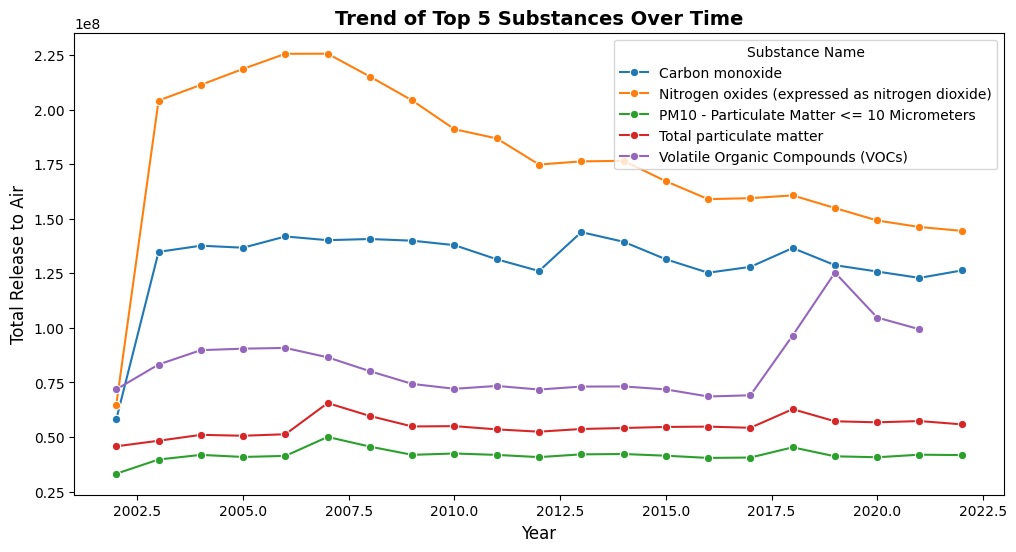

In [ ]:
top_substances = df.groupby('Substance Name (English)')['Total Release to Air'].sum().nlargest(5).index
trend_data = df[df['Substance Name (English)'].isin(top_substances)]
trend_data = trend_data.groupby(['Reporting_Year', 'Substance Name (English)'])['Total Release to Air'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_data, x='Reporting_Year', y='Total Release to Air', hue='Substance Name (English)', marker='o')
plt.title("Trend of Top 5 Substances Over Time", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Release to Air", fontsize=12)
plt.legend(title="Substance Name")
plt.show()


This pie chart represents the most common pollutants released into the environment.

Key Insights:
Nitrogen oxides (36.6%) are the most emitted pollutant, likely from combustion processes.
Carbon monoxide (27.0%) is another major contributor, mainly from fuel combustion.
Volatile Organic Compounds (16.4%) are significant, often linked to industrial emissions.
Total particulate matter (11.3%) and PM10 (8.6%) contribute to air pollution, affecting air quality and health.

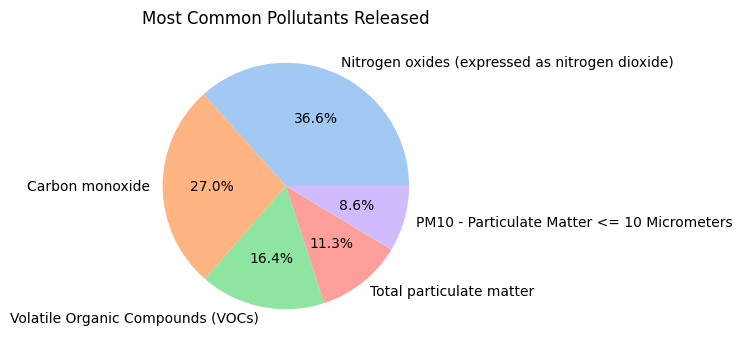

In [ ]:
# Group by pollutant and sum emissions
top_pollutants = df.groupby('Substance Name (English)')['Total Release to Air'].sum().reset_index()

# Get the top 5
top_pollutants = top_pollutants.sort_values(by='Total Release to Air', ascending=False).head(5)

# Plot
plt.figure(figsize=(4,4))
plt.pie(top_pollutants['Total Release to Air'], labels=top_pollutants['Substance Name (English)'], autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Most Common Pollutants Released")
plt.show()
